<a href="https://colab.research.google.com/github/shubharthaksangharsha/car_price_linear_regression/blob/main/MST_ML_LAB_by_Shubharthak%2C_20BCS6872.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***LAB MST***
## ***CAR PRICE PREDICTION***
***by***
# ***Shubharthak Sangharasha, 20BCS6872***


---
# **Step1. Importing the libraries**
We will import all the required libraries for our **Linear Regression**. 
For loading the dataset: **Pandas**
For giving the data to model: **numpy**,
For visualizing the data: **matplot and seaborn** 
For building the model and predicting the values: **scikit-learn**

In [295]:
#Importing the required libraries.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

# **Step2. Reading the data from CSV file.**
Before loading the dataset we have configure our panda max_columns and max_rows to None(so that we can read all the data at once).
Now, we will load our dataset using pandas read_csv method.

In [296]:
pd.set_option("display.max_columns", None) #to check all the columns
pd.set_option("display.max_rows", None) #to check all the rows
df = pd.read_csv("CarPrice.csv") #loading the csv file
df #reading the csv file 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


After loading the dataset we will Understand our Dataset.

# **Step3. Understanding the Data.**

In [297]:
df.shape #checking the total rows and columns

(205, 26)

In [298]:
df.describe() #getting the stats info 

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

After Understanding the dataset. We will first Fix the CarName to CompanyName.
Next, We will fix invalid values i.e Spelling error in CompanyName 

    maxda = mazda
    Nissan = nissan
    porsche = porcshce
    toyota = toyouta
    vokswagen = volkswagen = vw
Then we will also check if there any duplicates values. If yes, then fix it.


# **Step4. Cleaning the Data.**

In [300]:
#Spliting the company name from the CarName column
print(df['CarName']) #Getting all the CarName once for understanding 
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0]) #splitting the CarName data into company name 
df.insert(loc=3, column="CompanyName", value=CompanyName, allow_duplicates=False) #inserting to companyName data into dataset
df.drop(['CarName'],axis=1,inplace=True) #dropping carName data 

0                   alfa-romero giulia
1                  alfa-romero stelvio
2             alfa-romero Quadrifoglio
3                          audi 100 ls
4                           audi 100ls
5                             audi fox
6                           audi 100ls
7                            audi 5000
8                            audi 4000
9                  audi 5000s (diesel)
10                            bmw 320i
11                            bmw 320i
12                              bmw x1
13                              bmw x3
14                              bmw z4
15                              bmw x4
16                              bmw x5
17                              bmw x3
18                    chevrolet impala
19               chevrolet monte carlo
20                 chevrolet vega 2300
21                       dodge rampage
22                 dodge challenger se
23                          dodge d200
24                   dodge monaco (sw)
25                  dodge

In [301]:
df.head() #checking data after dropping the CarName value.

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [302]:
print(df.CompanyName.unique()) #checking for unique values
print(f'Length of unique values: {len(df.CompanyName.unique())}')#checking the unique values 

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
Length of unique values: 28


Fixing the invalid values

In [303]:
#Fixing Invalid Values
def replace_name(name1, name2):
  df.CompanyName.replace(name1, name2, inplace=True)
df.CompanyName = df.CompanyName.str.lower()
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [304]:
#Checking for duplicates values 
df.loc[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [305]:
print(f'Length of unique values: {len(df.CompanyName.unique())}')#checking the unique values 
df.CompanyName.unique() #fixed the invalid values

Length of unique values: 22


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# **Step4. Visualizing the Data.**
Now, we will try to visualize the data of our dataset.
First we will visualize our Output Value i.e Price.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


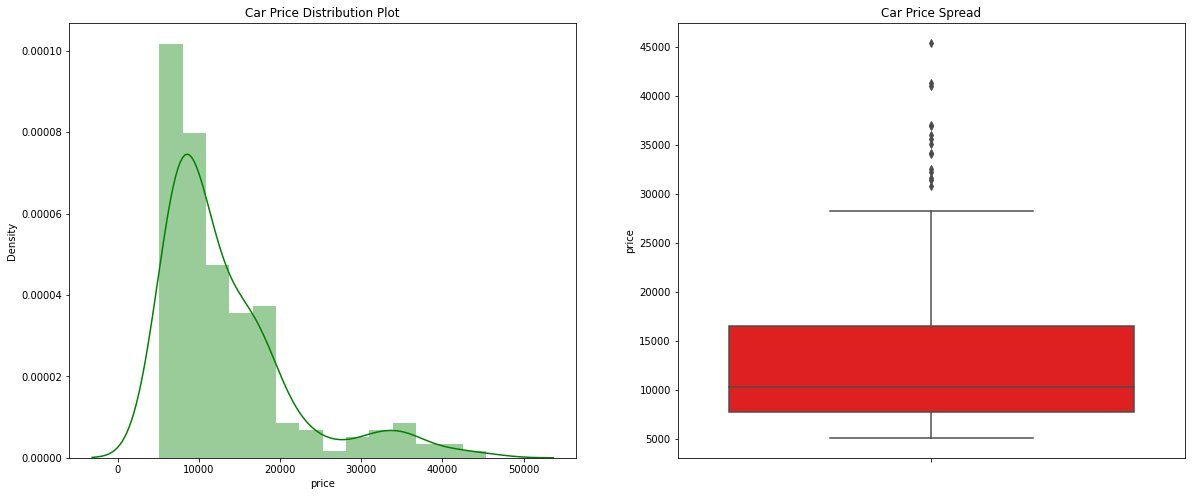

In [306]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price, color='green')

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price, color='red')

plt.show()


#**What we can understand from the figure is that most prices in dataset are very low**.

In [307]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])) #Understanding the 

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


- Also, we can see clearly that there is a huge difference in mean and median of price distribution. 
- Also, The data points are far spread out from the mean, which indicates a high variance in the car prices.

# **Step5. Visualizing the Discrete Values.**
We will now try to visualize the discrete values

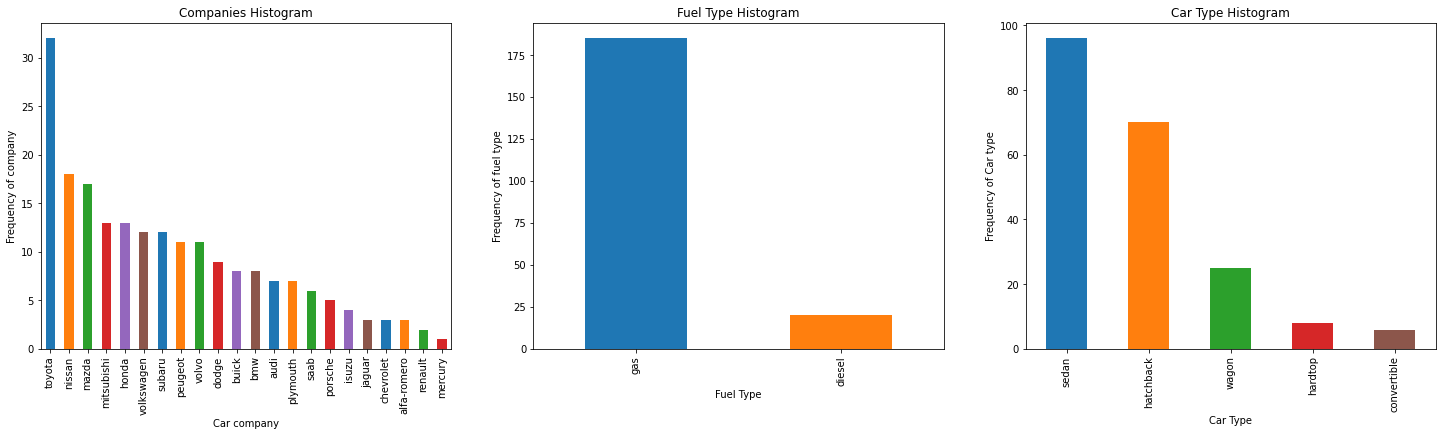

In [308]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df['CompanyName'].value_counts().plot(kind='bar', color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5'])
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.fueltype.value_counts().plot(kind='bar', color=['C0', 'C1'])
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df.carbody.value_counts().plot(kind='bar', color=['C0', 'C1', 'C2', 'C3', 'C5'])
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

#**What We Understod from the visualization**:
- Toyota seemed to be favored car company.
- Number of gas fueled cars are more than diesel.
- sedan is the top car type prefered.


#**Step6: Visualising numerical data**

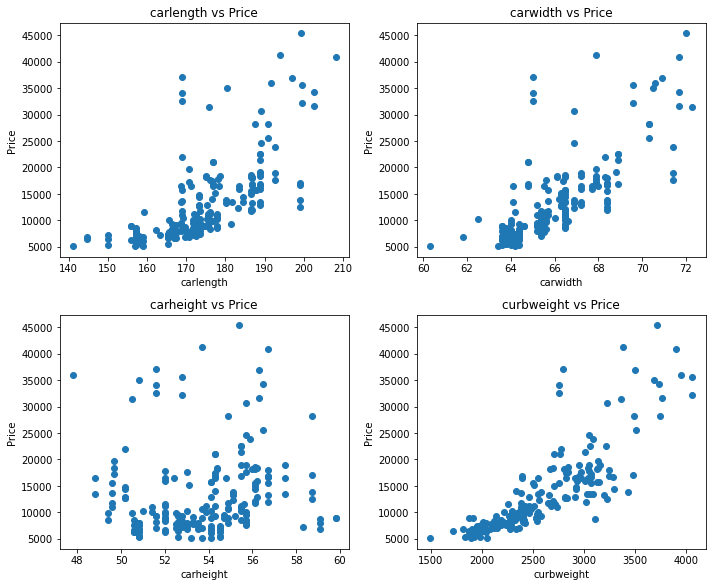

In [309]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()


#**What we understood**
- Carwidth, Carlength and curbweight seems to have a positive correlation with price. 
- Carheight doesn't show any significant trend with price.


---

#**List of significant variables after Visual analysis :**

- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 





#**Step 7: Creating new Dataset of Significant Features**

In [310]:
#Getting new Dataset using Significant Features
new_df= df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                  'carlength','carwidth']]
print(f'Length of X features: {len(new_df.columns)-1}')
new_df.head()

Length of X features: 13


,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


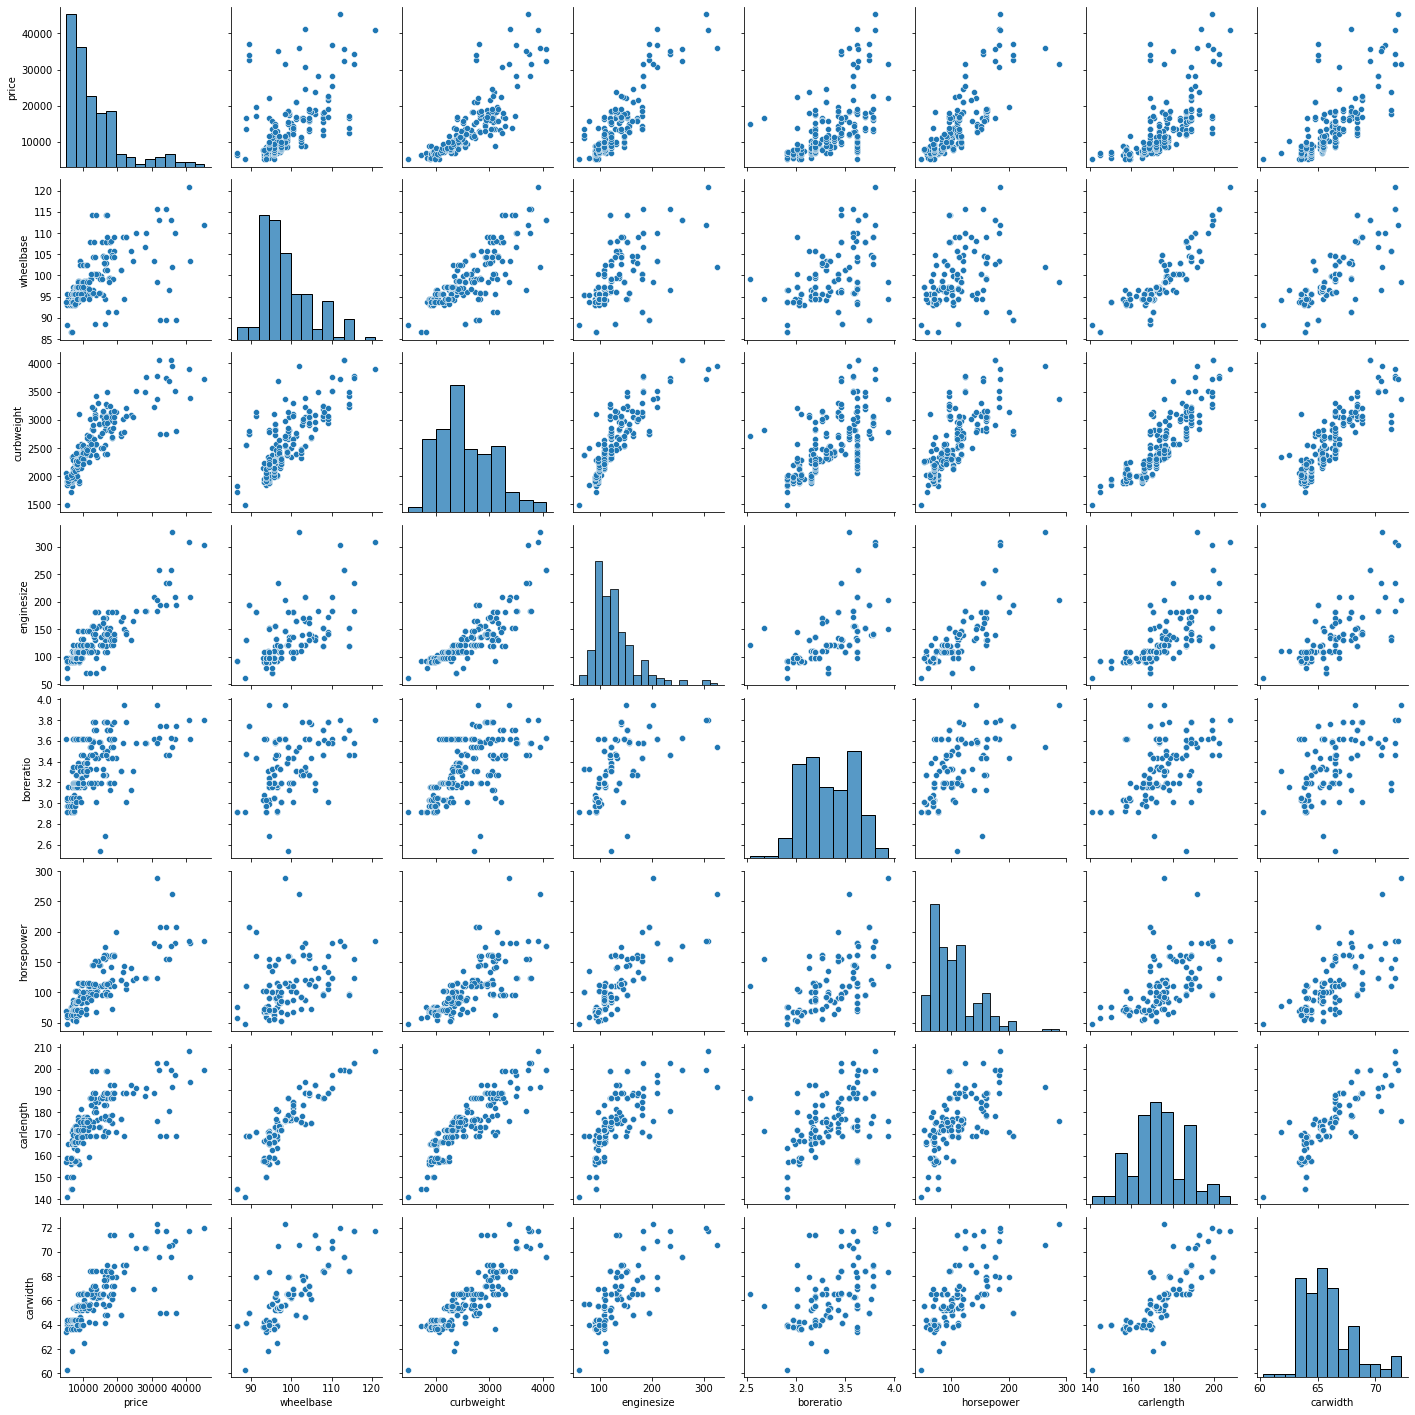

In [311]:
#Plotting the New Dataset with revelant features
sns.pairplot(new_df)
plt.show()


#**Step 7: Data Encoding**
- Now we will do Data Encoding for the Non-Numeric Values. 
- Our model required Numeric Dataset,so we will encode the Non-numeric (discrete data) into a numeric dataset using a mapping function.

In [312]:
# Defining the map function
def data_encoding(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    print(temp)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the new_df
new_df = data_encoding('fueltype',new_df)
new_df = data_encoding('aspiration',new_df)
new_df = data_encoding('carbody',new_df)
new_df = data_encoding('drivewheel',new_df)
new_df = data_encoding('enginetype',new_df)
new_df = data_encoding('cylindernumber',new_df)

     gas
0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     0
64     1
65     1
66     0
67     0
68     0
69     0
70     0
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     0
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    0
109    1
1

In [313]:
new_df.head() #Checking the encoded the data 

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [314]:
new_df.shape #Checking the total Features/Labels

(205, 28)

#**Step 8: Training, Testing and Normalizing the Model**

#**Spliting The Dataset into train and test**

In [315]:
np.random.seed(0) #to make the random variables predictable
x_train, x_test = train_test_split(new_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#**Normalizing the Data**

In [316]:
#For Normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
x_train[num_vars] = scaler.fit_transform(x_train[num_vars])

In [317]:
x_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [318]:
x_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#**Drawing the result in a heatmap for better understanding**

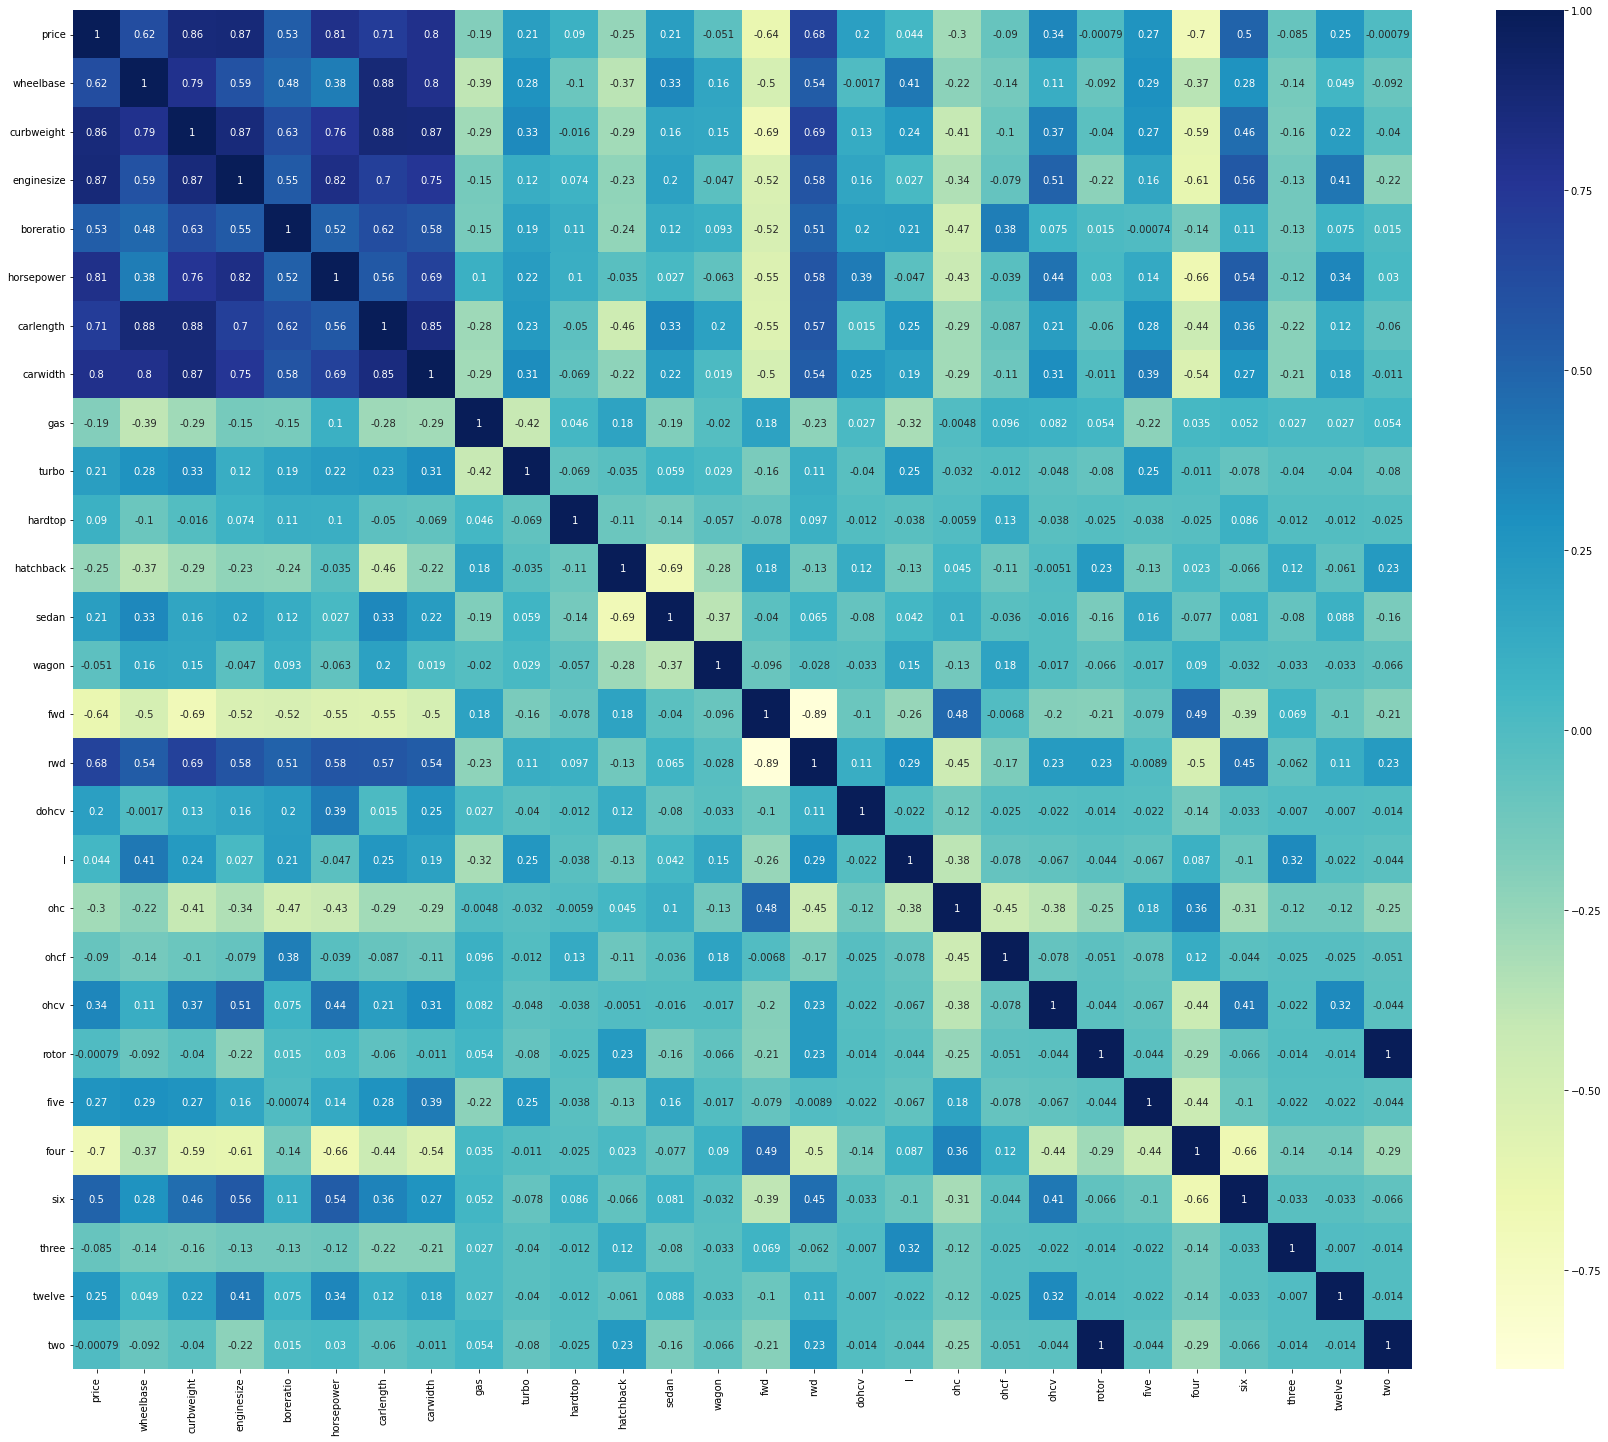

In [319]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(x_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- Highly correlated variables to price are - `curbweight`, `enginesize`, `horsepower`,`carwidth` and `highend`.


#**Splitting the data into x_train and y_train**

In [320]:
#Dividing data into X and y variables
y_train = x_train.pop('price')
X_train = x_train

#**Step 9: Building the model**

In [321]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(f'r2_score for training set: {r2_score(y_train, y_pred)}')

r2_score for training set: 0.9174040074084739


#**Step10: Plotting y_train and y_pred for training**

Text(0, 0.5, 'y_pred')

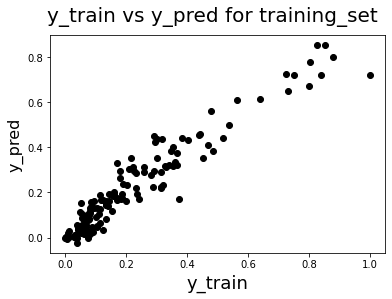

In [322]:
#EVALUATION OF THE MODEL
# Plotting y_train and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_pred, color='black')
fig.suptitle('y_train vs y_pred for training_set', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   


#**Step11: Prediction and Testing**


---

#**Normalizing the x_test**

In [323]:
#Normalizing 
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
x_test[num_vars] = scaler.fit_transform(x_test[num_vars])

#**Dividing into y_test and X_test**

In [324]:
#Dividing into X and y
y_test = x_test.pop('price')
X_test = x_test

In [325]:
y_pred = model.predict(X_test)
print(f'r2_score for testing set: {r2_score(y_test, y_pred)}')

r2_score for testing set: 0.6244762574569231


#**Step 12: Plotting y_test and y_pred for testing**

Text(0, 0.5, 'y_pred')

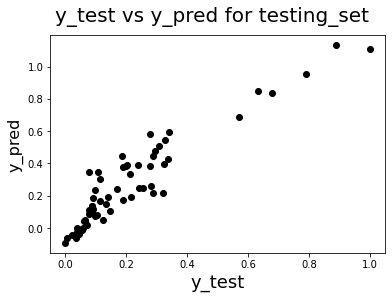

In [326]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred, color='black')
fig.suptitle('y_test vs y_pred for testing_set', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   